[1] Package import

In [100]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

[2] functions   

In [104]:
#activation function
#sigmoid function
def sigmoid(x, derivative=False):
    return x*(1-x) if derivative else 1/(1+np.exp(-x))

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)


[3] read data

In [102]:
file_data   = "mnist.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector    

    count += 1
    
    
#Datanum
trDataNum=6000
tDataNum=4000
    
trainX = list_image[:,0:6000] 
trainY = list_label[0:6000] 
testX =  list_image[:,6000:10000] 
testY = list_label[6000:10000]

trainY =trainY.reshape((1,6000))
testY =testY.reshape((1,4000))


[3] sort and calculate average image and calculate the result

In [103]:
# Epoch num
NUM_EPOCH=10000

#Array for writing loss, accuracy
trLossArray=np.zeros((NUM_EPOCH+1,1))
tLossArray=np.zeros((NUM_EPOCH+1,1))
trAcArray=np.zeros((NUM_EPOCH+1,1))
tAcArray=np.zeros((NUM_EPOCH+1,1))

lr=0.01 #learning Rate

#weight

np.random.seed(0)

u=0.01*np.random.randn(196,784)#layer 1 weight (input : input feature) 

v=0.01*np.random.randn(49,196)#layer 2 weight (input: w1 output feature) 

w=0.01*np.random.randn(10,49)#layer 3  weight (input :w2 output feature) 

#bias 
a=np.zeros((1,1))#layer 1  bias 

b=np.zeros((1,1))#layer 2 bias 

c=np.zeros((1,1))#layer 3 bias 

#X for drawing the graph
x_=np.arange(NUM_EPOCH+1)#X

(196, 784)


[4] Plot the average image

In [99]:
for epoch in range(NUM_EPOCH+1):
    
    #forward propagation(train)
    trZ1=np.dot(u,trainX)+a#Layer 1
    trA1=sigmoid(trZ1)

    trZ2=np.dot(v,trA1)+b#Layer 2
    trA2=sigmoid(trZ2)
    
    trZ3=np.dot(w,trA2)+c#Layer 3
    trA3=sigmoid(trZ3)

    #get train loss
    trloss=-(np.multiply(trainY,np.log(trA3))+np.multiply((1-trainY),np.log(1-trA3)))
    trloss=trloss.T
    trloss=np.mean(trloss,axis=1)   
    trloss=1/trDataNum*np.sum(trloss)
    trLossArray[epoch]=trloss
    
    #forward propagation(test)
    tZ1=np.dot(u,testX)+a#Layer 1
    tA1=sigmoid(tZ1)
    
    tZ2=np.dot(v,tA1)+b#Layer 2
    tA2=sigmoid(tZ2)
    
    tZ3=np.dot(w,tA2)+c#Layer 3
    tA3=sigmoid(tZ3)
    
    #get test loss
    tloss=-(np.multiply(testY,np.log(tA3))+np.multiply((1-testY),np.log(1-tA3)))
    tloss=tloss.T
    tloss=np.mean(tloss,axis=1)   
    tloss=1/tDataNum*np.sum(tloss)
    tLossArray[epoch]=tloss
    
    #get Accuracy
    trainPY=np.argmax(trA3.T,axis=1)
    trAccuracy=((trainPY == trainY).sum())/trDataNum
    trAcArray[epoch]=trAccuracy
    
    testPY=np.argmax(tA3.T,axis=1)
    tAccuracy=((testPY == testY).sum())/tDataNum
    tAcArray[epoch]=tAccuracy
    
    #backward propagation
    dz3=trA3-trainY
    dw=1/trDataNum*np.dot(dz3,trA2.T)
    dc=1/trDataNum*np.sum(dz3,axis=1,keepdims=True)
    
    dz2=np.multiply(np.dot(w.T,dz3),trA2*(1.0-trA2))
    dv=1/trDataNum*np.dot(dz2,trA1.T)
    db=1/trDataNum*np.sum(dz2,axis=1,keepdims=True)
    
    dz1=np.multiply(np.dot(v.T,dz2),trA1*(1.0-trA1))
    du=1/trDataNum*np.dot(dz1,trainX.T)
    da=1/trDataNum*np.sum(dz1,axis=1,keepdims=True)
    
    
    #update weight and bias
    u=u-lr*du
    a=a-lr*da    
    
    v=v-lr*dv
    b=b-lr*db
    
    w=w-lr*dw
    c=c-lr*dc
    
    #check the data per epoch 50
    if epoch%50==0:    
        print("epoch :" + str(epoch+1))
        print("train loss :  " +np.array2string(trloss))
        print("test loss :  " +np.array2string(tloss))
        print("train accuracy :  " +np.array2string(trAccuracy))
        print("test accuracy :  " +np.array2string(tAccuracy))

ValueError: shapes (49,10) and (1,6000) not aligned: 10 (dim 1) != 1 (dim 0)

[5] Present the output of the neural network with random weights

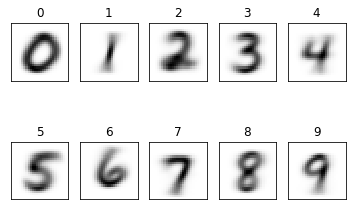

In [16]:
#plt.show()

#
# plot the average image of all the images for each digit
#
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(num_image):

    im_average[:, list_label[i]] += list_image[:, i]
    im_count[list_label[i]] += 1

for i in range(10):

    im_average[:, i] /= im_count[i]

    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()